In [1]:
#Importing Required Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#loading the cleaned csv file 'BoxOfficeCollections_cleaned'
df = pd.read_csv('BoxOfficeCollections_cleaned.csv')
print('check the dataset')
print(df.head())

print('------------------------------creating sqlite database and table----------------------------')


check the dataset
                  movie  year  score  adjusted_score             director  \
0               Hot Rod  2007     39          42.918       Akiva Schaffer   
1            Game Night  2018     85          99.838   John Francis Daley   
2  The First Wives Club  1996     49          53.174          Hugh Wilson   
3           Scary Movie  2000     52          54.973  Keenen Ivory Wayans   
4              Blockers  2018     84          96.883           Kay Cannon   

                                                cast  \
0  Andy Samberg, Jorma Taccone, Bill Hader, Danny...   
1  Jason Bateman, Rachel McAdams, Kyle Chandler, ...   
2  Goldie Hawn, Bette Midler, Diane Keaton, Maggi...   
3  Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...   
4  Leslie Mann, Ike Barinholtz, John Cena, Kathry...   

                                           consensus  box_office_collection  \
0  For Rod Kimball (Andy Samberg), performing stu...             14371564.0   
1  Max and Annie's weekl

In [2]:
# Connect to SQLite (creates a file if it doesn't exist)
conn = sqlite3.connect('IMDB_box_office.db')

# Save DataFrame to a SQL table named 'movies'
df.to_sql('movies', conn, if_exists='replace', index=False)
#find the saved location of the database 'IMDB_box_office.db'
#print(os.getcwd())

1367

### ⭐ Top 10 IMDb-Rated Movies
Retrieving the top 10 movies based on IMDb ratings and display them as a horizontal bar chart.

,Movie,IMDB_Rating
0,12 Angry Men,9.0
1,The Dark Knight,9.0
2,The Lord of the Rings: The Return of the King,9.0
3,Fargo,8.9
4,Inception,8.8
5,"The Good, the Bad and the Ugly",8.8
6,The Lord of the Rings: The Fellowship of the Ring,8.8
7,The Lord of the Rings: The Two Towers,8.8
8,Friday Night Lights,8.7
9,Invincible,8.7


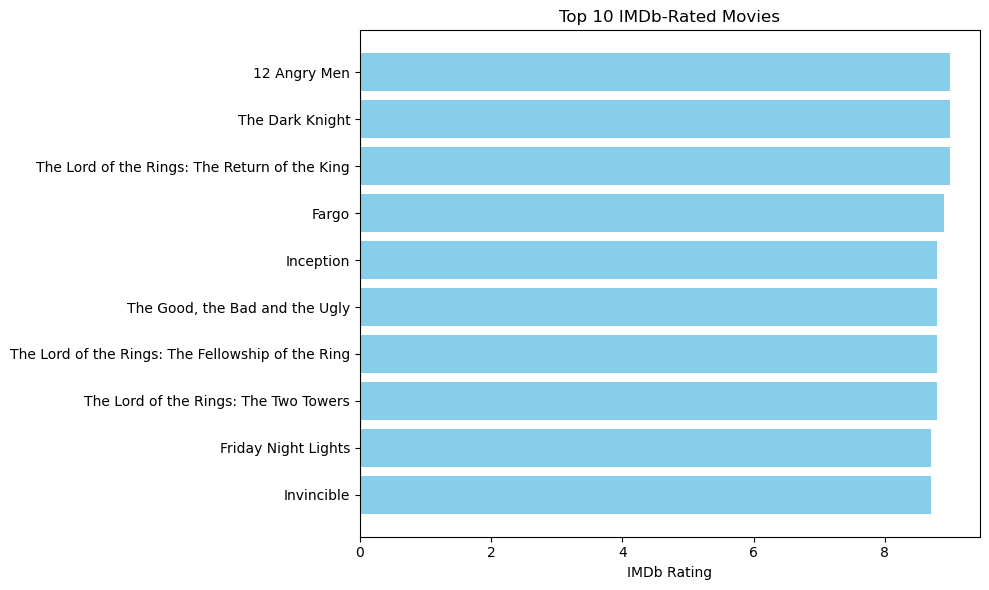

In [3]:
query = """
SELECT
	movie AS Movie,
	imdb_rating AS IMDB_Rating
FROM
	movies
ORDER BY
	imdb_rating DESC,
	movie ASC
LIMIT 10
"""
#read the query and store it in a dataframe df
df = pd.read_sql_query(query, conn)
#display result

display(df)

#displying result using horizontal bar chart for top IMDB_Rating movies
plt.figure(figsize=(10,6))
plt.barh(df['Movie'], df['IMDB_Rating'], color='skyblue')
plt.xlabel('IMDb Rating')
plt.title('Top 10 IMDb-Rated Movies')
plt.gca().invert_yaxis()
plt.tight_layout()
# Save image
#plt.savefig('images/top_10_imdb_rated.png')
plt.show()

#close the connection
#conn.close()

### 💵 Top 10 Movies by Box Office Collection
Retrieving the top 10 movies based on Box Office Collection and displaying them as a horizontal bar chart.

,Movie,Box_Office_Collections
0,Avengers: Endgame,2.797801e+09
1,Furious 7,1.516882e+09
2,Black Panther,1.336494e+09
3,Beauty and the Beast,1.273109e+09
4,Frozen,1.265597e+09
5,Incredibles 2,1.242805e+09
6,The Fate of the Furious,1.236704e+09
7,Captain America: Civil War,1.151919e+09
8,Toy Story 4,1.073080e+09
9,Toy Story 3,1.068880e+09


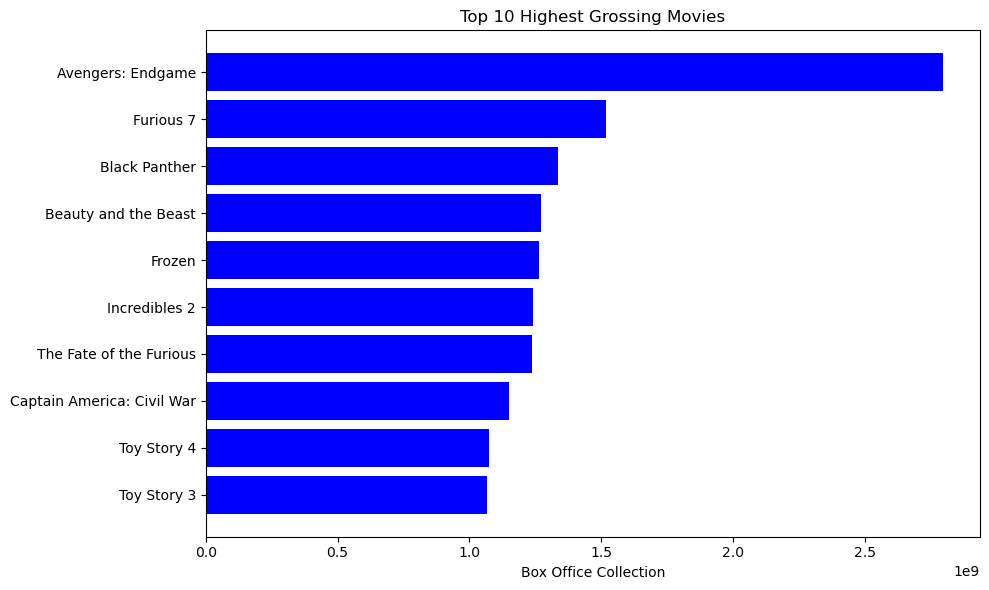

In [4]:
query = """
SELECT
	movie AS Movie,
	box_office_collection AS Box_Office_Collections
FROM
	movies
ORDER BY
	box_office_collection DESC,
	movie ASC
LIMIT 10
"""
#read the query and store it in a dataframe df
df = pd.read_sql_query(query, conn)
#display result

display(df)

#displying result using horizontal bar chart for top-grossing movies
plt.figure(figsize=(10,6))
plt.barh(df['Movie'], df['Box_Office_Collections'], color='blue')
plt.xlabel('Box Office Collection')
plt.title('Top 10 Highest Grossing Movies')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 💰 Average Box Office Collection by Genre
Grouping movies by genre to compute and visualize the average box office revenue.


,Genre,Avg_revenue
0,Sci-Fi,3.511279e+08
1,Adventure,2.754179e+08
2,Comedy,1.714915e+08
3,Thriller,1.546885e+08
4,Drama,1.088979e+08
5,Horror,5.414383e+07
6,unknown,1.050258e+07


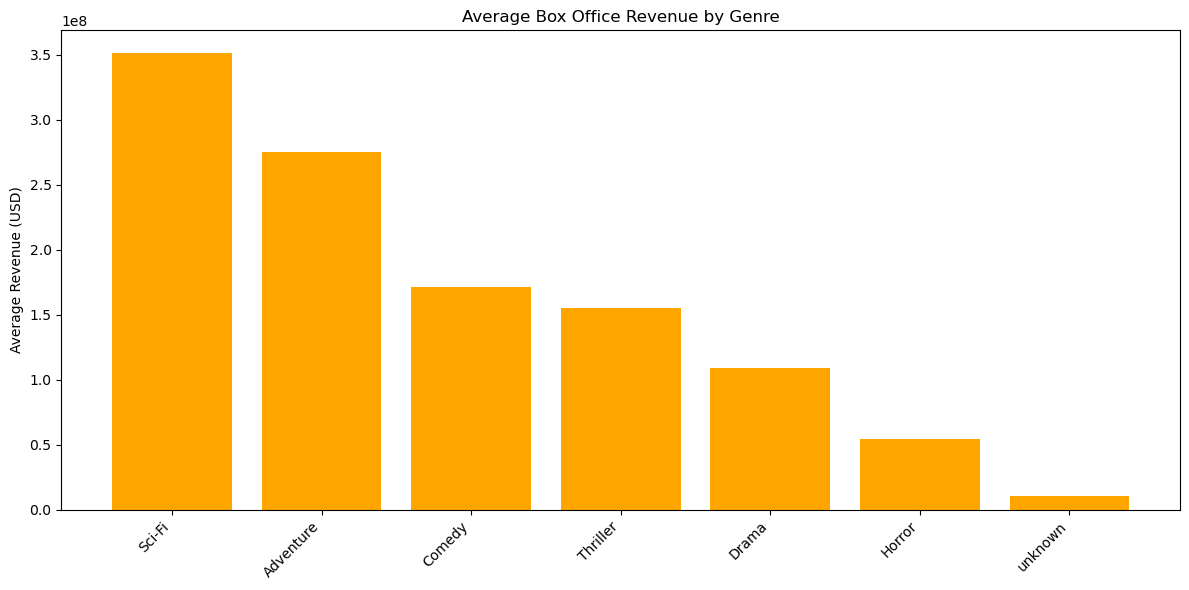

In [5]:
query = """
SELECT
	imdb_genre AS Genre,
	ROUND(AVG(box_office_collection), 2) AS Avg_revenue
FROM
	movies
GROUP BY
	imdb_genre
ORDER BY Avg_revenue DESC
"""
#read the query and store it in a dataframe df
df = pd.read_sql_query(query, conn)
#display result

display(df)

plt.figure(figsize=(12,6))
plt.bar(df['Genre'], df['Avg_revenue'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Revenue (USD)')
plt.title('Average Box Office Revenue by Genre')
plt.tight_layout()
# Save image
#plt.savefig('images/avg_revenue_by_genre.png')
plt.show()


### 📈 Number of Movies Released Per Year
This plot shows the count of movies released each year.


,Year,Number of movies
0,1919,1
1,1921,2
2,1923,1
3,1924,2
4,1925,3
...,...,...
92,2018,49
93,2019,74
94,2020,40
95,2021,18


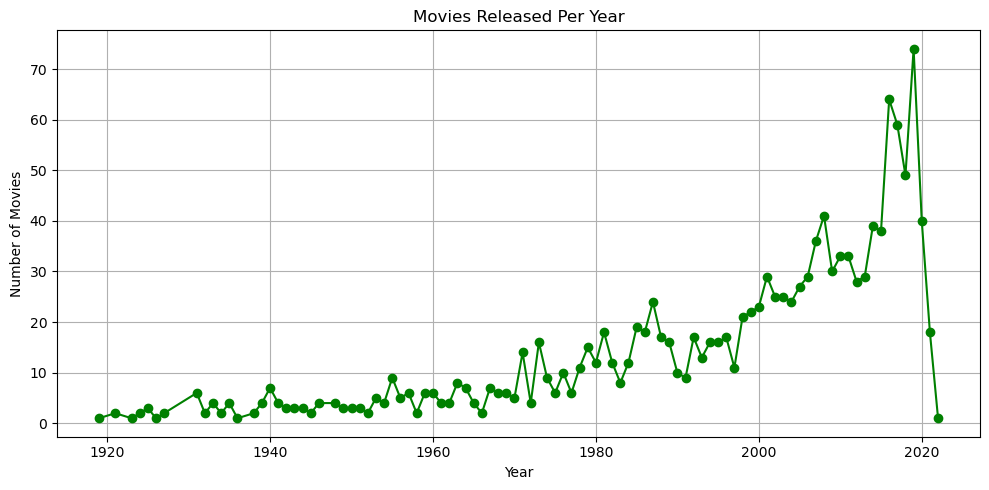

In [6]:
query = """
SELECT
	year AS Year,
	count(movie) AS [Number of movies]
FROM
	movies
GROUP BY
	year
ORDER BY
	year
"""
#read the query and store it in a dataframe df
df = pd.read_sql_query(query, conn)
#display result

display(df)

plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Number of movies'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released Per Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🎬 Average IMDb Rating by Year
How have movie ratings changed over time? This chart shows the average IMDb rating by release year.


,Year,Average imdb_rating
0,1919,8.00
1,1921,7.30
2,1923,7.20
3,1924,7.30
4,1925,7.80
...,...,...
92,2018,6.91
93,2019,6.98
94,2020,7.02
95,2021,6.93


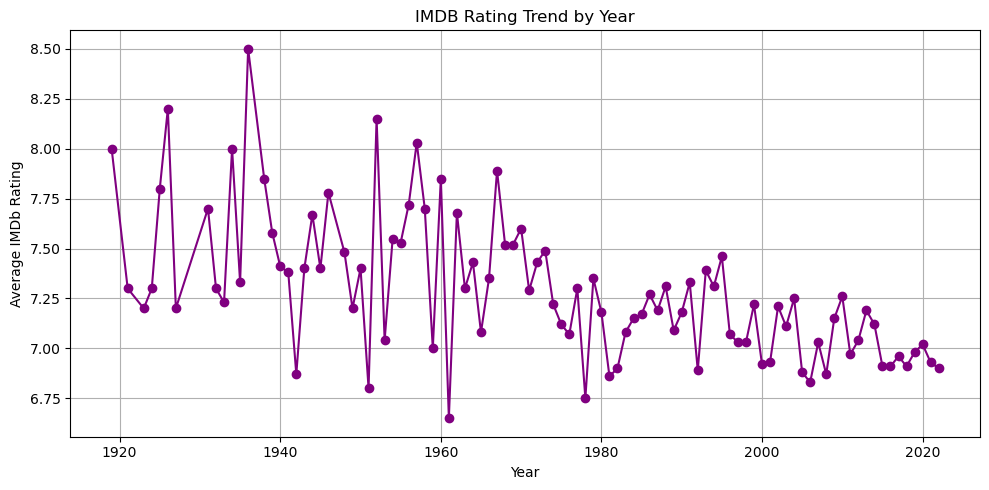

In [7]:
query = """
SELECT
	year AS Year,
	ROUND(AVG(imdb_rating), 2)  AS [Average imdb_rating]
FROM
	movies
GROUP BY
	year
ORDER BY
	year
"""
#read the query and store it in a dataframe df
df = pd.read_sql_query(query, conn)
#display result

display(df)

plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Average imdb_rating'], marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('IMDB Rating Trend by Year')
plt.grid(True)
plt.tight_layout()
# Save image
#plt.savefig('images/avg_imdb_rating_by_year.png')
plt.show()


### 🎯 Low-Rated but High-Earning Movies

This query explores an interesting contradiction — movies that received **poor IMDb ratings (below 6.0)** yet managed to earn **over $100 million** at the box office. These could represent strong marketing, star power, or audience divergence from critics.


,Movie,IMDB_Rating,Box Office Collection
0,Casino Royale,5.0,594420283.0
1,Cinderella,4.2,542351353.0
2,Clash of the Titans,5.8,493214888.0
3,The Mummy,5.4,416385488.0
4,High School Musical 3: Senior Year,4.8,274392880.0
5,Lara Croft: Tomb Raider,5.7,273330185.0
6,Journey to the Center of the Earth,5.8,243180937.0
7,The Driver,3.6,243180937.0
8,The Day the Earth Stood Still,5.5,237370350.0
9,Into the Woods,5.9,212550576.0


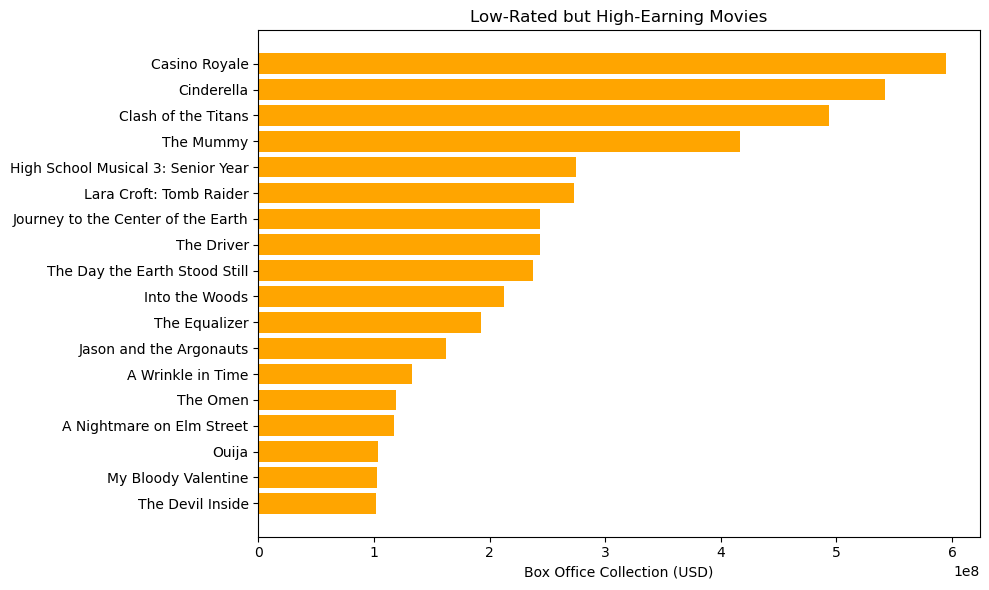

In [8]:
# SQL query
query = '''
SELECT
	movie AS Movie,
	imdb_rating AS IMDB_Rating,
	box_office_collection AS [Box Office Collection]
FROM
	movies
WHERE
	imdb_rating < 6 AND box_office_collection > 100000000
ORDER BY
	box_office_collection DESC
'''
#read the query and store it in a dataframe df
df = pd.read_sql_query(query, conn)

#display result

display(df)
# Visualization

plt.figure(figsize=(10, 6))
plt.barh(df['Movie'], df['Box Office Collection'], color='orange')
plt.xlabel('Box Office Collection (USD)')
plt.title('Low-Rated but High-Earning Movies')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 🎭 Top Genres by Movie Count

This query displays the **top 10 genres** in the dataset based on how many movies fall into each category. It helps understand which genres are most represented in the dataset.


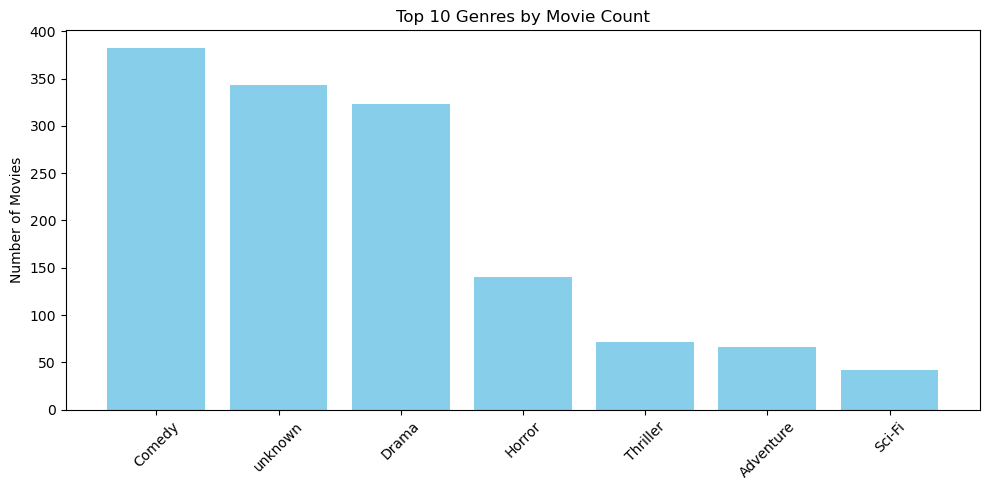

In [9]:
# SQL query
query = '''
SELECT
	COUNT(*) AS Num_of_movies,
	imdb_genre AS Genre
FROM
	movies
GROUP BY
	imdb_genre
ORDER BY
	COUNT(*) DESC
LIMIT 10
'''
df_top_genres = pd.read_sql_query(query, conn)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(df_top_genres['Genre'], df_top_genres['Num_of_movies'], color='skyblue')
plt.title('Top 10 Genres by Movie Count')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
